In [158]:
import pandas as pd
import numpy as np
from rfpimp import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_curve, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [483]:
metadata_byday = pd.read_csv('data/metadata_byday.csv')

In [484]:
metadata_byday

,FIPS,STATE,ST_ABBR,COUNTY,2020-03-22_confirmed,2020-03-22_deaths,2020-03-22_recovered,2020-03-22_active,2020-03-23_confirmed,2020-03-23_deaths,...,2020-05-12_recovered,2020-05-12_active,2020-05-13_confirmed,2020-05-13_deaths,2020-05-13_recovered,2020-05-13_active,2020-05-14_confirmed,2020-05-14_deaths,2020-05-14_recovered,2020-05-14_active
0,1001,ALABAMA,AL,Autauga,0,0,0,0,0,0,...,0.0,87.0,93.0,4.0,0.0,89.0,104.0,4.0,0.0,100.0
1,1003,ALABAMA,AL,Baldwin,2,0,0,0,3,0,...,0.0,220.0,231.0,7.0,0.0,224.0,243.0,8.0,0.0,235.0
2,1005,ALABAMA,AL,Barbour,0,0,0,0,0,0,...,0.0,66.0,69.0,1.0,0.0,68.0,74.0,1.0,0.0,73.0
3,1007,ALABAMA,AL,Bibb,0,0,0,0,0,0,...,0.0,45.0,46.0,1.0,0.0,45.0,46.0,1.0,0.0,45.0
4,1009,ALABAMA,AL,Blount,0,0,0,0,0,0,...,0.0,45.0,45.0,0.0,0.0,45.0,45.0,0.0,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,WY,Sweetwater,0,0,0,0,0,0,...,0.0,20.0,20.0,0.0,0.0,20.0,21.0,0.0,0.0,21.0
3138,56039,WYOMING,WY,Teton,2,0,0,0,2,0,...,0.0,98.0,99.0,0.0,0.0,99.0,99.0,0.0,0.0,99.0
3139,56041,WYOMING,WY,Uinta,0,0,0,0,0,0,...,0.0,9.0,9.0,0.0,0.0,9.0,9.0,0.0,0.0,9.0
3140,56043,WYOMING,WY,Washakie,0,0,0,0,0,0,...,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0


In [373]:
state_orders = pd.read_csv('data/state_orders.csv')
state_orders

,FIPS,STATE,date_announced,date_effective,date_lift,date_reopen,order_length,days_since_order,days_since_reopen,ann_to_eff,reopened,days_since_lifted,lifted
0,1001,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,1,14,1
1,1003,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,1,14,1
2,1005,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,1,14,1
3,1007,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,1,14,1
4,1009,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,1,0,1
3138,56039,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,1,0,1
3139,56041,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,1,0,1
3140,56043,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,1,0,1


In [161]:
sociohealth = pd.read_csv('data/sociohealth.csv')
sociohealth

,FIPS,Pop_Dens,perc_below_pov,perc_disabled,perc_minority,percent_multiunit_housing,perc_overcrowded,perc_no_vehicle,perc_group_quarters,perc_fair_poor_health,...,Population,perc_fem,perc_rural,pcp_rate_100k,65_older,17_younger,uninsured,lim_eng,per_dem,per_gop
0,1001,92.859967,15.4,19.3,25.0,3.8,1.4,5.6,1.0,18,...,55416,51.3,42.0,74.0,14.65,24.30,8.05,0.80,0.239569,0.734358
1,1003,130.901947,10.6,14.0,17.0,18.3,1.3,3.4,1.4,18,...,208563,51.5,42.3,117.0,19.60,21.80,11.10,0.65,0.195653,0.773515
2,1005,29.132150,28.9,22.2,53.9,1.3,3.4,9.2,11.2,26,...,25965,46.9,67.8,69.0,18.00,21.10,12.10,1.55,0.466603,0.522714
3,1007,36.190214,14.0,16.7,25.4,2.4,0.8,6.0,9.3,20,...,22643,46.4,68.4,128.0,15.85,20.75,9.95,0.35,0.214220,0.769662
4,1009,89.395591,14.4,14.2,12.9,0.9,1.6,4.2,0.9,21,...,57704,50.6,90.0,33.0,17.90,23.30,12.50,1.80,0.084699,0.898519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,4.231045,12.0,12.3,20.4,5.5,1.9,2.4,1.3,15,...,44165,48.2,10.9,88.0,10.60,26.85,12.00,1.85,0.194046,0.729428
3138,56039,5.769301,7.1,7.0,18.4,7.5,7.2,2.4,4.0,12,...,23191,48.4,46.4,229.0,13.55,19.00,12.50,3.95,0.600608,0.321945
3139,56041,9.899987,12.5,17.2,12.5,5.8,2.8,3.9,1.3,16,...,20773,49.4,43.1,106.0,12.35,29.45,12.10,1.00,0.149261,0.764187
3140,56043,3.631169,12.4,14.9,18.0,1.1,1.8,5.0,2.0,16,...,8235,49.7,36.0,97.0,20.80,23.90,16.20,0.50,0.143203,0.783580


In [321]:
races = pd.read_csv('data/race_df.csv')
races

,FIPS,perc_afr_am,perc_nat_am_as,perc_asian,perc_nh_opi,perc_hisp,perc_nonhisp_white
0,1001,19.0,0.5,1.1,0.1,2.7,75.0
1,1003,9.0,0.8,1.1,0.1,4.4,83.2
2,1005,47.5,0.6,0.5,0.2,4.2,46.5
3,1007,21.6,0.4,0.2,0.1,2.5,74.4
4,1009,1.4,0.6,0.3,0.1,9.1,87.5
...,...,...,...,...,...,...,...
3137,56037,1.1,1.5,0.8,0.2,16.1,79.6
3138,56039,0.6,0.9,1.2,0.1,15.1,81.5
3139,56041,0.7,1.3,0.6,0.2,9.0,87.5
3140,56043,0.5,1.7,0.8,0.1,13.9,82.6


In [323]:
sociohealth2 = pd.merge(sociohealth, races, how = 'left', on = 'FIPS')
sociohealth2

,FIPS,Pop_Dens,perc_below_pov,perc_disabled,perc_minority,percent_multiunit_housing,perc_overcrowded,perc_no_vehicle,perc_group_quarters,perc_fair_poor_health,...,uninsured,lim_eng,per_dem,per_gop,perc_afr_am,perc_nat_am_as,perc_asian,perc_nh_opi,perc_hisp,perc_nonhisp_white
0,1001,92.859967,15.4,19.3,25.0,3.8,1.4,5.6,1.0,18,...,8.05,0.80,0.239569,0.734358,19.0,0.5,1.1,0.1,2.7,75.0
1,1003,130.901947,10.6,14.0,17.0,18.3,1.3,3.4,1.4,18,...,11.10,0.65,0.195653,0.773515,9.0,0.8,1.1,0.1,4.4,83.2
2,1005,29.132150,28.9,22.2,53.9,1.3,3.4,9.2,11.2,26,...,12.10,1.55,0.466603,0.522714,47.5,0.6,0.5,0.2,4.2,46.5
3,1007,36.190214,14.0,16.7,25.4,2.4,0.8,6.0,9.3,20,...,9.95,0.35,0.214220,0.769662,21.6,0.4,0.2,0.1,2.5,74.4
4,1009,89.395591,14.4,14.2,12.9,0.9,1.6,4.2,0.9,21,...,12.50,1.80,0.084699,0.898519,1.4,0.6,0.3,0.1,9.1,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,4.231045,12.0,12.3,20.4,5.5,1.9,2.4,1.3,15,...,12.00,1.85,0.194046,0.729428,1.1,1.5,0.8,0.2,16.1,79.6
3138,56039,5.769301,7.1,7.0,18.4,7.5,7.2,2.4,4.0,12,...,12.50,3.95,0.600608,0.321945,0.6,0.9,1.2,0.1,15.1,81.5
3139,56041,9.899987,12.5,17.2,12.5,5.8,2.8,3.9,1.3,16,...,12.10,1.00,0.149261,0.764187,0.7,1.3,0.6,0.2,9.0,87.5
3140,56043,3.631169,12.4,14.9,18.0,1.1,1.8,5.0,2.0,16,...,16.20,0.50,0.143203,0.783580,0.5,1.7,0.8,0.1,13.9,82.6


In [372]:
sociohealth2.to_csv('data/sociohealth2.csv', index = False)

In [217]:
X = state_orders[['order_length','days_since_order', 'days_since_reopen', 'ann_to_eff']]

In [218]:
X = state_orders[['order_length','days_since_order', 'days_since_reopen']]

In [536]:
X = pd.merge(state_orders, sociohealth, how = 'left', on = 'FIPS')

In [537]:
X = pd.merge(state_orders, sociohealth2, how = 'left', on = 'FIPS')

In [538]:
X

,FIPS,STATE,date_announced,date_effective,date_lift,date_reopen,order_length,days_since_order,days_since_reopen,ann_to_eff,...,uninsured,lim_eng,per_dem,per_gop,perc_afr_am,perc_nat_am_as,perc_asian,perc_nh_opi,perc_hisp,perc_nonhisp_white
0,1001,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,...,8.05,0.80,0.239569,0.734358,19.0,0.5,1.1,0.1,2.7,75.0
1,1003,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,...,11.10,0.65,0.195653,0.773515,9.0,0.8,1.1,0.1,4.4,83.2
2,1005,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,...,12.10,1.55,0.466603,0.522714,47.5,0.6,0.5,0.2,4.2,46.5
3,1007,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,...,9.95,0.35,0.214220,0.769662,21.6,0.4,0.2,0.1,2.5,74.4
4,1009,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,...,12.50,1.80,0.084699,0.898519,1.4,0.6,0.3,0.1,9.1,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,...,12.00,1.85,0.194046,0.729428,1.1,1.5,0.8,0.2,16.1,79.6
3138,56039,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,...,12.50,3.95,0.600608,0.321945,0.6,0.9,1.2,0.1,15.1,81.5
3139,56041,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,...,12.10,1.00,0.149261,0.764187,0.7,1.3,0.6,0.2,9.0,87.5
3140,56043,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,...,16.20,0.50,0.143203,0.783580,0.5,1.7,0.8,0.1,13.9,82.6


In [539]:
X.drop(columns = ['FIPS', 'STATE','date_announced','date_effective','date_lift','date_reopen'], inplace = True)

In [540]:
X.drop(columns = ['ann_to_eff', 'perc_diab','17_younger'], inplace = True)

In [541]:
X.drop(columns = ['unemployed', 'perc_minority'], inplace = True)

In [542]:
X.drop(columns = ['perc_disabled', 'pcp_rate_100k', 'perc_group_quarters', ], inplace = True)

In [543]:
X

,order_length,days_since_order,days_since_reopen,reopened,days_since_lifted,lifted,Pop_Dens,perc_below_pov,percent_multiunit_housing,perc_overcrowded,...,uninsured,lim_eng,per_dem,per_gop,perc_afr_am,perc_nat_am_as,perc_asian,perc_nh_opi,perc_hisp,perc_nonhisp_white
0,26,40,14,1,14,1,92.859967,15.4,3.8,1.4,...,8.05,0.80,0.239569,0.734358,19.0,0.5,1.1,0.1,2.7,75.0
1,26,40,14,1,14,1,130.901947,10.6,18.3,1.3,...,11.10,0.65,0.195653,0.773515,9.0,0.8,1.1,0.1,4.4,83.2
2,26,40,14,1,14,1,29.132150,28.9,1.3,3.4,...,12.10,1.55,0.466603,0.522714,47.5,0.6,0.5,0.2,4.2,46.5
3,26,40,14,1,14,1,36.190214,14.0,2.4,0.8,...,9.95,0.35,0.214220,0.769662,21.6,0.4,0.2,0.1,2.5,74.4
4,26,40,14,1,14,1,89.395591,14.4,0.9,1.6,...,12.50,1.80,0.084699,0.898519,1.4,0.6,0.3,0.1,9.1,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0,0,13,1,0,1,4.231045,12.0,5.5,1.9,...,12.00,1.85,0.194046,0.729428,1.1,1.5,0.8,0.2,16.1,79.6
3138,0,0,13,1,0,1,5.769301,7.1,7.5,7.2,...,12.50,3.95,0.600608,0.321945,0.6,0.9,1.2,0.1,15.1,81.5
3139,0,0,13,1,0,1,9.899987,12.5,5.8,2.8,...,12.10,1.00,0.149261,0.764187,0.7,1.3,0.6,0.2,9.0,87.5
3140,0,0,13,1,0,1,3.631169,12.4,1.1,1.8,...,16.20,0.50,0.143203,0.783580,0.5,1.7,0.8,0.1,13.9,82.6


In [544]:
X.columns

Index(['order_length', 'days_since_order', 'days_since_reopen', 'reopened',
       'days_since_lifted', 'lifted', 'Pop_Dens', 'perc_below_pov',
       'percent_multiunit_housing', 'perc_overcrowded', 'perc_no_vehicle',
       'perc_fair_poor_health', 'perc_smokers', 'perc_obese',
       'perc_phys_inactive', 'prev_hosp_rate_medicare', 'air_pollution',
       'age_adjusted_mortality', 'perc_insuf_sleep', 'health_costs',
       'med_house_income', 'wnw_seg', 'Population', 'perc_fem', 'perc_rural',
       '65_older', 'uninsured', 'lim_eng', 'per_dem', 'per_gop', 'perc_afr_am',
       'perc_nat_am_as', 'perc_asian', 'perc_nh_opi', 'perc_hisp',
       'perc_nonhisp_white'],
      dtype='object')

In [545]:
y = (metadata_byday.iloc[:,-1] > metadata_byday.iloc[:,-5]).astype(int)

In [546]:
y.value_counts()

0    1761
1    1381
dtype: int64

In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [548]:
rfc = RandomForestClassifier(oob_score = True)
rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.7748091603053435

Text(0.5, 0, 'Average contribution of information gain')

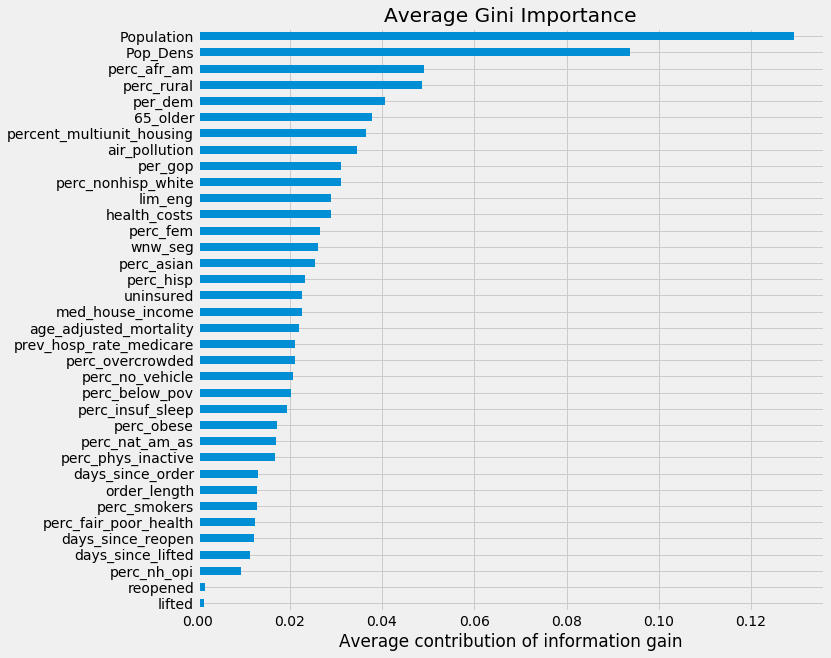

In [549]:
feature_scores = pd.Series(rfc.feature_importances_, index=X.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(10,10))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

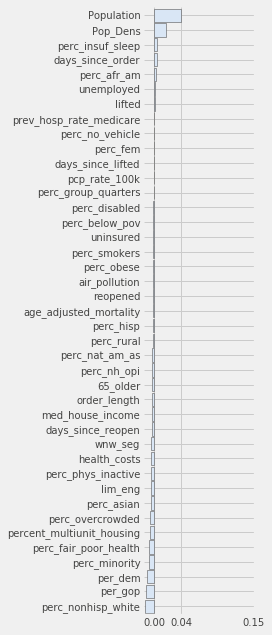

In [526]:
imp = importances(rfc, X_test, y_test, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [527]:
#rf1 = rfc.fit(X_train1, y_train1)
confusion_matrix(y_test, rfc.predict(X_test))

array([[356,  61],
       [127, 242]])

In [528]:
precision_score(y_test, rfc.predict(X_test))

0.7986798679867987

In [529]:
recall_score(y_test, rfc.predict(X_test))

0.6558265582655827

In [530]:
#on just statewide orders
65, 60, 51
69, 63, 52
68, 60, 64

(68, 60, 64)

In [531]:
#added in all sociohealth features
77, 73, 64
77, 72, 67
75, 72, 62
76, 73, 65
77, 76, 64
78, 75, 66

(78, 75, 66)

In [532]:
#dropped a few sociohealth
79, 78, 70
78, 77, 68
78, 76, 68
78, 76, 66
78, 76, 65
78, 75, 65

(78, 75, 65)

In [533]:
estimator_list = [50, 75, 100, 125, 150]
score_list = []
for i in estimator_list:
    rfc = RandomForestClassifier(n_estimators=i, oob_score=True)
    rfc.fit(X_train, y_train)
    score_list.append(rfc.score(X_test, y_test))
estimator_scores = dict(zip(estimator_list, score_list))
estimator_scores

{50: 0.7582697201017812,
 75: 0.772264631043257,
 100: 0.7620865139949109,
 125: 0.7760814249363868,
 150: 0.7697201017811705}

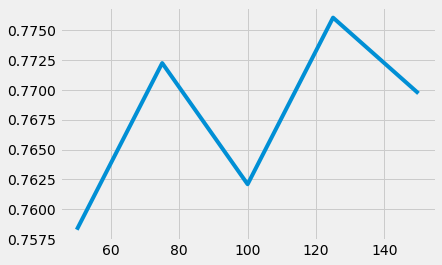

In [534]:
x = estimator_list
y = score_list
fig, ax = plt.subplots()
ax.plot(x,y)

In [510]:
max_features = []
score_list = []
for i in range(1, len(X.columns)):
    rfc = RandomForestClassifier(max_features=i, oob_score=True)
    rfc.fit(X_train, y_train)
    score_list.append(rfc.score(X_test, y_test))
    max_features.append(i)
feature_scores = dict(zip(max_features, score_list))
feature_scores

{1: 0.7557251908396947,
 2: 0.7455470737913485,
 3: 0.7569974554707379,
 4: 0.7455470737913485,
 5: 0.767175572519084,
 6: 0.7544529262086515,
 7: 0.7684478371501272,
 8: 0.7595419847328244,
 9: 0.7633587786259542,
 10: 0.7646310432569975,
 11: 0.767175572519084,
 12: 0.7684478371501272,
 13: 0.7697201017811705,
 14: 0.7735368956743003,
 15: 0.7608142493638677,
 16: 0.7633587786259542,
 17: 0.7659033078880407,
 18: 0.772264631043257,
 19: 0.7633587786259542,
 20: 0.7684478371501272,
 21: 0.7798982188295165,
 22: 0.7748091603053435,
 23: 0.7811704834605598,
 24: 0.7620865139949109,
 25: 0.7684478371501272,
 26: 0.7519083969465649,
 27: 0.772264631043257,
 28: 0.7735368956743003,
 29: 0.7697201017811705,
 30: 0.7608142493638677,
 31: 0.7633587786259542,
 32: 0.7633587786259542,
 33: 0.77735368956743,
 34: 0.7697201017811705,
 35: 0.7582697201017812,
 36: 0.7709923664122137,
 37: 0.767175572519084,
 38: 0.7646310432569975,
 39: 0.772264631043257,
 40: 0.7735368956743003,
 41: 0.7824427480

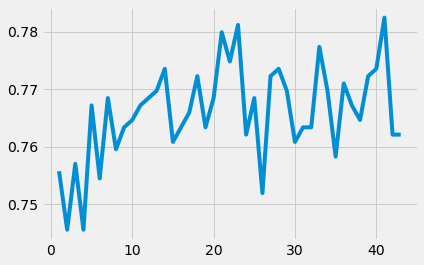

In [511]:
x = max_features
y = score_list
fig, ax = plt.subplots()
ax.plot(x,y)